[0, 783, 780, 984, 1968, 3065, 588, 42, 5288, 6318]
3065
1658
7896
Node(addr=3065, color='blue')
<class '__main__.Node'>
Node(addr=3065, color='red')
<class '__main__.Node'>


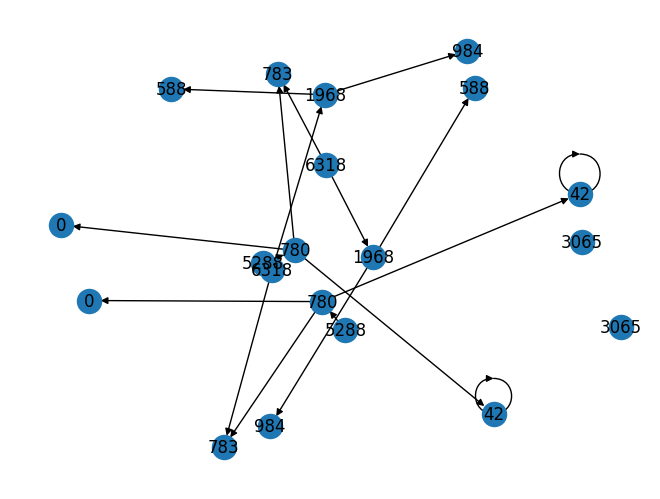

In [2]:
import random
from attr import frozen
import networkx as nx

G = nx.DiGraph()

@frozen
class Node:
    addr: int
    color: str

    def __hash__(self):
        return hash(self.addr)

    def __eq__(self, other):
        return self.addr == other.addr


# generate a random graph
kept_addr: int = None
for i in range(10):
    random_addr = random.randint(0, 1000) * i
    G.add_node(random_addr, node=Node(random_addr, "blue"))

    # keep one addr
    if i == 5:
        kept_addr = random_addr

# add some random edges
for i in range(10):
    random_node1 = random.choice(list(G.nodes))
    random_node2 = random.choice(list(G.nodes))
    G.add_edge(random_node1, random_node2)

# draw the graph
nx.draw(G, with_labels=True)

# tests
print(G.nodes)
print(hash(kept_addr))
print(hash(1658))
print(hash(7896))

# get node of kept addr
kept_node: Node = G.nodes[kept_addr]["node"]
print(kept_node)
print(type(kept_node))

# replace kept node with new node
new_node = Node(kept_addr, "red")
nx.set_node_attributes(G, {kept_addr: new_node}, "node")

new_kept_node: Node = G.nodes[kept_addr]["node"]
print(new_kept_node)
print(type(new_kept_node))

# draw the graph
nx.draw(G, with_labels=True)

In [1]:
from ssh_key_discover.params import ProgramParams
from ssh_key_discover import GraphAnalyser, GraphData
from ssh_key_discover.ml_discovery.ml_pipelines import Pipelines

params = ProgramParams(debug=False)
HEAP_DUMP_FILEPATH = params.TEST_HEAP_DUMP_RAW_FILE_PATH

graph_data = GraphData(
    params,
    HEAP_DUMP_FILEPATH,
    params.BLOCK_BYTE_SIZE
)
graph_analyser = GraphAnalyser(graph_data)
if params.DEBUG:
    print("Annotating graph...")
graph_analyser.annotate_graph()
if params.DEBUG:
    print("Cleaning graph...")
graph_analyser.clean_graph()
graph_analyser.visualize_graph() # generate the graph image


Program paths are OK.
Program paths are OK.
IMPORTANT VALUE NODE: KN_F(0x557024f08450) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
IMPORTANT VALUE NODE: KN_B(0x557024f0cdc0) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
IMPORTANT VALUE NODE: KN_D(0x557024f0ce00) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
IMPORTANT VALUE NODE: KN_C(0x557024f0fd70) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
IMPORTANT VALUE NODE: KN_A(0x557024f0fd90) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
IMPORTANT VALUE NODE: KN_E(0x557024f0fdd0) of type <class 'ssh_key_discover.mem_graph.graph_structures.KeyNode'>
